In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Global değişkenler


In [ ]:
IMG_SIZE =224
seed = 42
NUM_CLASSES = 4  #4 farklı klasör içindeydi
BATCH_SIZE = 32
EPOCHS = 100
CLASSES = ['Bacterial_spot','Early_blight','Late_blight','Leaf_Mold'] #sınıflarımı tanımladım ve hücreyi çalıştırdım değişkenlerim hazır olsun diye. kasörde nasılsa aynı yazılması lazım!!

In [ ]:
TRAIN_DATADIR = '/content/drive/MyDrive/Colab/Hafta_11/train/'
TEST_DATADIR =  '/content/drive/MyDrive/Colab/Hafta_11/test/'
VAL_DATADIR =  '/content/drive/MyDrive/Colab/Hafta_11/val/'  #yolu kopyalayıp koyuyosunuz ya sona 1 / daha koyuyoruz unutmayın pls!!

# Train verilerinin ayarlanması

In [ ]:
import cv2

training_data = []

def creating_training_data():
  for category in CLASSES:
    path = os.path.join(TRAIN_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
creating_training_data()
print(len(training_data))

2091


In [ ]:
testing_data = []

def creating_testing_data():
  for category in CLASSES:
    path = os.path.join(TEST_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
creating_testing_data()
print(len(testing_data))

584


In [ ]:
validating_data = []

def creating_validation_data():
  for category in CLASSES:
    path = os.path.join(VAL_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        validating_data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
creating_validation_data()
print(len(validating_data))

231


# Train,Test Validation görüntü ve labellerinin ayrılması


In [ ]:
X_training_data = []
y_training_data = []

for classes, label in training_data:
  X_training_data.append(classes)
  y_training_data.append(label)

In [ ]:
X_testing_data = []
y_testing_data = []

for classes, label in testing_data:
  X_testing_data.append(classes)
  y_testing_data.append(label)

In [ ]:
X_validation_data = []
y_validation_data = []

for classes, label in validating_data:
  X_validation_data.append(classes)
  y_validation_data.append(label)

# Train, test , validation verilerinin numpy array'e çevirilmesi

In [ ]:
train_x = np.array(X_training_data)
test_x = np.array(X_testing_data)

In [ ]:
train_y = np.array(y_training_data)
test_y = np.array(y_testing_data)

In [ ]:
valid_x = np.array(X_validation_data)
valid_y = np.array(y_validation_data)

In [ ]:
print("X_train shape:",train_x.shape )
print("y_train shape:",train_y.shape )
print("X_test shape:",test_x.shape )
print("y_test shape:",test_y.shape )
print("X_val shape:",valid_x.shape )
print("y_val shape:",valid_y.shape)

X_train shape: (2091, 224, 224, 3)
y_train shape: (2091,)
X_test shape: (584, 224, 224, 3)
y_test shape: (584,)
X_val shape: (231, 224, 224, 3)
y_val shape: (231,)


# Train,test valiadtion verilerinin yaygın kullanım değişkenlerine atanması

In [ ]:
x_train = train_x   #x_train  biz artık bunu eğiticez
y_train = train_y   #y_train   bu da görüntülerin sınfları

x_test = test_x
y_test = test_y

x_val = valid_x
y_val = valid_y

In [ ]:
print("X_train shape:",x_train.shape )
print("y_train shape:",y_train.shape )
print("X_test shape:",x_test.shape )
print("y_test shape:",y_test.shape )
print("X_val shape:",x_val.shape )
print("y_val shape:",y_val.shape)

X_train shape: (2091, 224, 224, 3)
y_train shape: (2091,)
X_test shape: (584, 224, 224, 3)
y_test shape: (584,)
X_val shape: (231, 224, 224, 3)
y_val shape: (231,)


# Train,test validation verilerinin normalizasyonu

In [ ]:
#şimdi x_train üzerinde işlemler yapacağız
x_train = x_train.astype('float32')
x_train /= 255  # görüntü matrislerimizin içinde yer alan değerler  0 ve 255 arasında oldugu için  bu bolme var  Normallestirme islemini yapıyoruz  y ye niye yapmıyoruz cunku onlar görüntü etiketleri kategorik veriler old için onun işlemi farklı

x_test = x_test.astype('float32')
x_test /= 255

x_val = x_val.astype('float32')
x_val /= 255

#kategorik verilerin ayarlanması



In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes =  NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes =  NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, num_classes =  NUM_CLASSES)

In [ ]:
print("X_train shape:",x_train.shape )
print("y_train shape:",y_train.shape )

print("X_test shape:",x_test.shape )
print("y_test shape:",y_test.shape )

print("X_val shape:",x_val.shape )
print("y_val shape:",y_val.shape)


X_train shape: (2091, 224, 224, 3)
y_train shape: (2091, 4)
X_test shape: (584, 224, 224, 3)
y_test shape: (584, 4)
X_val shape: (231, 224, 224, 3)
y_val shape: (231, 4)


# CNN MODELİNİN TASARLANMASI

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

#evrişim katmanları
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

#tam bağlantı (fully connected layer)
model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [ ]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 0.9801 - accuracy: 0.6055
Epoch 1: val_loss improved from inf to 4.17693, saving model to best_model.keras
66/66 [==============================] - 411s 6s/step - loss: 0.9801 - accuracy: 0.6055 - val_loss: 4.1769 - val_accuracy: 0.2727
Epoch 2/100
66/66 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.7446
Epoch 2: val_loss did not improve from 4.17693
66/66 [==============================] - 399s 6s/step - loss: 0.6562 - accuracy: 0.7446 - val_loss: 4.4275 - val_accuracy: 0.2727
Epoch 3/100
66/66 [==============================] - ETA: 0s - loss: 0.4898 - accuracy: 0.8111
Epoch 3: val_loss did not improve from 4.17693
66/66 [==============================] - 400s 6s/step - loss: 0.4898 - accuracy: 0.8111 - val_loss: 4.3257 - val_accuracy: 0.2727
Epoch 4/100
66/66 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.8288
Epoch 4: val_loss improved from 4.17693 to 2.74204, sav

<Figure size 640x480 with 0 Axes>

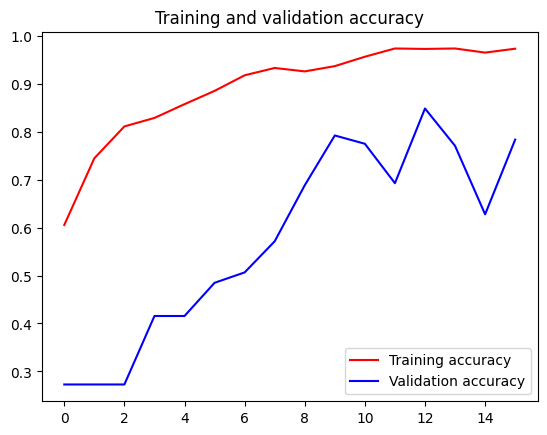

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#CNN MODELİNİN PERFORMANS SONUÇLARI VE KARMAŞIKLIK GRAFİĞİ VE ROC GRAFİĞİ


In [ ]:
train_score = model.evaluate(x_train, y_train)
print("Train Accuracy: ", train_score[1])

66/66 [==============================] - 56s 843ms/step - loss: 0.0106 - accuracy: 0.9967
Train Accuracy:  0.9966523051261902


In [ ]:
val_score = model.evaluate(x_val, y_val)
print("Validation Accuracy: ", val_score[1])

8/8 [==============================] - 6s 772ms/step - loss: 0.8597 - accuracy: 0.7835
Validation Accuracy:  0.7835497856140137


In [ ]:
test_score = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_score[1])

19/19 [==============================] - 15s 806ms/step - loss: 0.7247 - accuracy: 0.8390
Test Accuracy:  0.8390411138534546


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

19/19 [==============================] - 16s 822ms/step


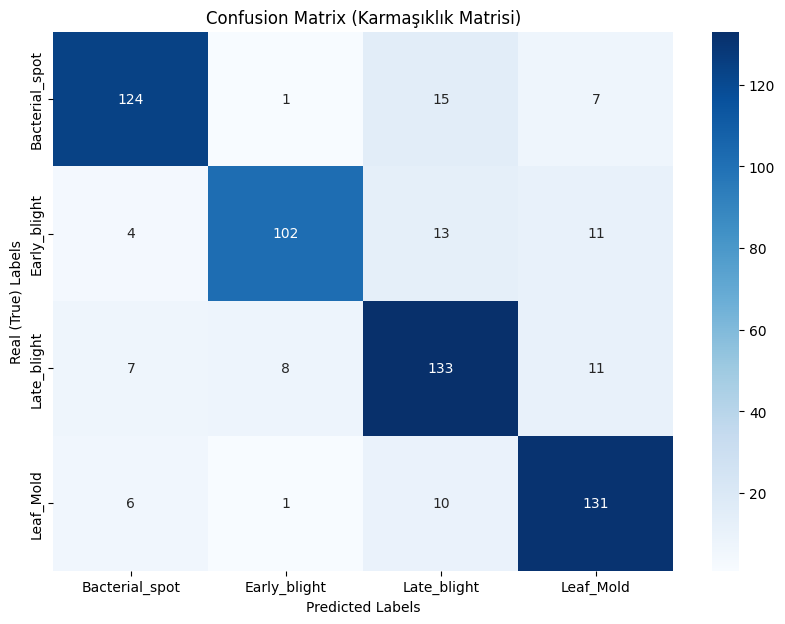

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Predicted Labels")
plt.ylabel("Real (True) Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test_classes, y_pred_classes, target_names=CLASSES)
print(report)

                precision    recall  f1-score   support

Bacterial_spot       0.88      0.84      0.86       147
  Early_blight       0.91      0.78      0.84       130
   Late_blight       0.78      0.84      0.81       159
     Leaf_Mold       0.82      0.89      0.85       148

      accuracy                           0.84       584
     macro avg       0.85      0.84      0.84       584
  weighted avg       0.84      0.84      0.84       584



19/19 [==============================] - 16s 828ms/step


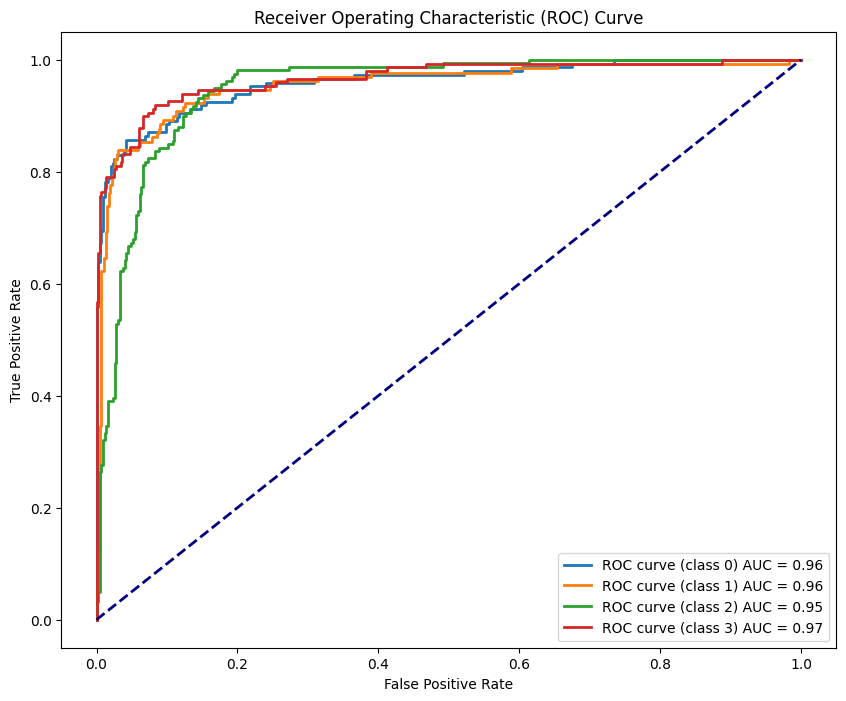

Mean AUC: 0.9577


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Gerçek etiketler (sınıf sayısını belirtmek için 4 sınıf var)
y_test_classes = np.argmax(y_test, axis=1)  # Gerçek sınıflar (etiketler)
y_pred = model.predict(x_test)
y_pred_probabilities = y_pred  # Olasılıkları alıyoruz

# Sınıf etiketlerini ikili hale getiriyoruz (binarize) çünkü ROC için gereklidir
y_test_bin = label_binarize(y_test_classes, classes=[0, 1, 2, 3])  # Sınıflar: 0, 1, 2, 3
n_classes = y_test_bin.shape[1]  # Sınıf sayısı

# ROC eğrisini çizmek için her sınıf için ROC eğrisini hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıflar için ROC eğrisini çiziyoruz
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {0}) AUC = {1:0.2f}'.format(i, roc_auc[i]))

# Diagonal çizgiyi çiziyoruz (rastgele tahminin grafiği)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik etiketlerini ve başlığını ekliyoruz
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Ortalama AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f'Mean AUC: {mean_auc:.4f}')


# **RESNET50** *Transfer Öğrenme (TRANSFER LEARNİNG)*

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import models, layers

input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model_resnet50V2 = ResNet50V2(weights='imagenet',
                              input_tensor=input_layer,
                              include_top=False)

last_layer = model_resnet50V2.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_resnet50V2 = models.Model(inputs=input_layer, outputs=output_layer)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in model_resnet50V2.layers[:-1]:
  layer.trainable = False

In [ ]:
model_resnet50V2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_resnet50V2 = model_resnet50V2.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    epochs = EPOCHS
                    )

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accuracy: 0.5553 - loss: 5.7147 - val_accuracy: 0.7706 - val_loss: 2.4978
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 470s 7s/step - accuracy: 0.9167 - loss: 0.5824 - val_accuracy: 0.7749 - val_loss: 2.2857
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 502s 7s/step - accuracy: 0.9645 - loss: 0.1958 - val_accuracy: 0.8009 - val_loss: 2.0533
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 487s 7s/step - accuracy: 0.9799 - loss: 0.1083 - val_accuracy: 0.8442 - val_loss: 2.2692
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 546s 8s/step - accuracy: 0.9871 - loss: 0.0712 - val_accuracy: 0.8485 - val_loss: 2.2544
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 531s 8s/step - accuracy: 0.9951 - loss: 0.0125 - val_accuracy: 0.8701 - val_loss: 2.2001
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 436s 6s/step - accuracy: 0.9970 - loss: 0.0130 - val_accuracy: 0.8268 - val_loss: 2.4265
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 392s 6s/step - accuracy: 0.9976 - loss: 0.0084 - val_accuracy: 0.

KeyboardInterrupt: 

In [ ]:
train_resnet50V2_score = model_resnet50V2.evaluate(x_train, y_train)
print("RESNET50V2 Train Accuracy: ", train_resnet50V2_score[1])

test_resnet50V2_score = model_resnet50V2.evaluate(x_test, y_test)
print("\nRESNET50V2 Test Accuracy: ", test_resnet50V2_score[1])

val_resnet50V2_score = model_resnet50V2.evaluate(x_val, y_val)
print("\nRESNET50V2 Validation Accuracy: ", val_resnet50V2_score[1])

# DENSENET121 Transfer Öğrenme  ( Transfer Öğrenme

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import models, layers

input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model_densenet121 = DenseNet121(weights='imagenet',
                              input_tensor=input_layer,
                              include_top=False)

last_layer = model_densenet121.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_densenet121 = models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
for layer in model_densenet121.layers[:-1]:
  layer.trainable = False

In [ ]:
model_densenet121.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_densenet121 = model_densenet121.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    epochs = EPOCHS
                    )

In [ ]:
train_densenet121_score = model_densenet121.evaluate(x_train, y_train)
print("DENSENET121 Train Accuracy: ", train_densenet121_score[1])

test_densenet121_score = model_densenet121.evaluate(x_test, y_test)
print("\nDENSENET121 Test Accuracy: ", test_densenet121_score[1])

val_densenet121_score = model_densenet121.evaluate(x_val, y_val)
print("\nDENSENET121 Validation Accuracy: ", val_densenet121_score[1])

# EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import models, layers

# EfficientNetB0 için giriş katmanını tanımlayın
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB0 modelini yükleyin
model_efficientnetb0 = EfficientNetB0(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb0.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb0 = models.Model(inputs=input_layer, outputs=output_layer)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# EfficientNetB0 modelinin son katmanı hariç diğer katmanları dondur
for layer in model_efficientnetb0.layers[-3:]:
    layer.trainable = False

In [ ]:
model_efficientnetb0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_efficientnetb0 = model_efficientnetb0.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 689s 10s/step - accuracy: 0.6616 - loss: 0.8417 - val_accuracy: 0.2208 - val_loss: 1.4580
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 664s 9s/step - accuracy: 0.9563 - loss: 0.1309 - val_accuracy: 0.2727 - val_loss: 1.4137
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 622s 9s/step - accuracy: 0.9813 - loss: 0.0538 - val_accuracy: 0.2554 - val_loss: 1.4457
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 624s 9s/step - accuracy: 0.9975 - loss: 0.0190 - val_accuracy: 0.2727 - val_loss: 1.4092
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 693s 10s/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.2814 - val_loss: 1.4203
Epoch 6/100
28/66 ━━━━━━━━━━━━━━━━━━━━ 5:48 9s/step - accuracy: 0.9955 - loss: 0.0159

In [ ]:
train_efficientnetb0_score = model_efficientnetb0.evaluate(x_train, y_train)
print("EfficientNetB0 Train Accuracy: ", train_efficientnetb0_score[1])

test_efficientnetb0_score = model_efficientnetb0.evaluate(x_test, y_test)
print("\nEfficientNetB0 Test Accuracy: ", test_efficientnetb0_score[1])

val_efficientnetb0_score = model_efficientnetb0.evaluate(x_val, y_val)
print("\nEfficientNetB0 Validation Accuracy: ", val_efficientnetb0_score[1])


# EfficientNetB1

In [ ]:
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb1 = EfficientNetB1(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb1.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb1 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb1.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb1 = model_efficientnetb1.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb1_score = model_efficientnetb1.evaluate(x_train, y_train)
print("EfficientNetB1 Train Accuracy: ", train_efficientnetb1_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb1_score = model_efficientnetb1.evaluate(x_test, y_test)
print("\nEfficientNetB1 Test Accuracy: ", test_efficientnetb1_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb1_score = model_efficientnetb1.evaluate(x_val, y_val)
print("\nEfficientNetB1 Validation Accuracy: ", val_efficientnetb1_score[1])


# EfficientNetB2

In [ ]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb1 = EfficientNetB2(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb2.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb2 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb2.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb2 = model_efficientnetb2.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb2_score = model_efficientnetb2.evaluate(x_train, y_train)
print("EfficientNetB2 Train Accuracy: ", train_efficientnetb2_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb2_score = model_efficientnetb2.evaluate(x_test, y_test)
print("\nEfficientNetB2 Test Accuracy: ", test_efficientnetb2_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb2_score = model_efficientnetb2.evaluate(x_val, y_val)
print("\nEfficientNetB2 Validation Accuracy: ", val_efficientnetb2_score[1])


# EfficientNetB3

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb3 = EfficientNetB3(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb3.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb3 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb3.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb3 = model_efficientnetb3.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb3_score = model_efficientnetb3.evaluate(x_train, y_train)
print("EfficientNetB3 Train Accuracy: ", train_efficientnetb3_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb3_score = model_efficientnetb3.evaluate(x_test, y_test)
print("\nEfficientNetB3 Test Accuracy: ", test_efficientnetb3_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb3_score = model_efficientnetb3.evaluate(x_val, y_val)
print("\nEfficientNetB3 Validation Accuracy: ", val_efficientnetb3_score[1])


# EfficientNetB4

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb4 = EfficientNetB4(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb4.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb4 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb4.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb4 = model_efficientnetb4.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb4_score = model_efficientnetb4.evaluate(x_train, y_train)
print("EfficientNetB4 Train Accuracy: ", train_efficientnetb4_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb4_score = model_efficientnetb4.evaluate(x_test, y_test)
print("\nEfficientNetB4 Test Accuracy: ", test_efficientnetb4_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb4_score = model_efficientnetb4.evaluate(x_val, y_val)
print("\nEfficientNetB4 Validation Accuracy: ", val_efficientnetb4_score[1])


# EfficientNetB5

In [ ]:
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb5 = EfficientNetB5(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb5.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb5 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb5.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb5 = model_efficientnetb5.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb5_score = model_efficientnetb5.evaluate(x_train, y_train)
print("EfficientNetB5 Train Accuracy: ", train_efficientnetb5_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb5_score = model_efficientnetb5.evaluate(x_test, y_test)
print("\nEfficientNetB5 Test Accuracy: ", test_efficientnetb5_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb5_score = model_efficientnetb5.evaluate(x_val, y_val)
print("\nEfficientNetB5 Validation Accuracy: ", val_efficientnetb5_score[1])


# EfficientNetB6

In [ ]:
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb6 = EfficientNetB6(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb6.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb6 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb6.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb6.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb6= model_efficientnetb6.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb6_score = model_efficientnetb6.evaluate(x_train, y_train)
print("EfficientNetB6 Train Accuracy: ", train_efficientnetb6_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb6_score = model_efficientnetb6.evaluate(x_test, y_test)
print("\nEfficientNetB6 Test Accuracy: ", test_efficientnetb6_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb6_score = model_efficientnetb6.evaluate(x_val, y_val)
print("\nEfficientNetB6 Validation Accuracy: ", val_efficientnetb6_score[1])


# EfficientNetB7

In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import models, layers

# EfficientNetB1 için giriş katmanı
input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# EfficientNetB1 modelini yükleyin
model_efficientnetb7 = EfficientNetB7(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False)

# Son katmanları ekleyin
last_layer = model_efficientnetb7.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

# Modeli tanımlayın
model_efficientnetb7 = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
for layer in model_efficientnetb7.layers[:-1]:
    layer.trainable = False


In [ ]:
model_efficientnetb7.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_efficientnetb7= model_efficientnetb7.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)


In [ ]:
# Eğitim veri seti doğruluğunu ölç
train_efficientnetb7_score = model_efficientnetb7.evaluate(x_train, y_train)
print("EfficientNetB7 Train Accuracy: ", train_efficientnetb7_score[1])

# Test veri seti doğruluğunu ölç
test_efficientnetb7_score = model_efficientnetb7.evaluate(x_test, y_test)
print("\nEfficientNetB7 Test Accuracy: ", test_efficientnetb7_score[1])

# Doğrulama veri seti doğruluğunu ölç
val_efficientnetb7_score = model_efficientnetb7.evaluate(x_val, y_val)
print("\nEfficientNetB7 Validation Accuracy: ", val_efficientnetb7_score[1])
